In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
acs = pd.read_csv('ACS16_NYC.csv')

In [3]:
acs.shape

(2120, 7)

In [4]:
acs.head()

,Unnamed: 0,census_tract,total_population,median_age,total_population_25yrsandover,total_bachelors_degree,median_income
0,0,Bronx_1,7503.0,32.1,303.0,0.7,10778.0
1,1,Bronx_2,5251.0,38.6,449.0,11.8,30760.0
2,2,Bronx_4,5980.0,39.4,300.0,14.3,32371.0
3,3,Bronx_16,6056.0,36.9,325.0,5.8,17848.0
4,4,Bronx_19,2682.0,32.5,227.0,13.7,21788.0


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
X = acs[['median_age', 'median_income', 'total_bachelors_degree', 'total_population']]

## Standard Scale

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## Cluster Analysis (K-Means)

### Find value of K

At 2 clusters, inertia is 5942.45085949374
At 3 clusters, inertia is 4550.663195417618
At 4 clusters, inertia is 3885.061436453046
At 5 clusters, inertia is 3439.232864013956
At 6 clusters, inertia is 3103.211061585675
At 7 clusters, inertia is 2894.462456620468
At 8 clusters, inertia is 2699.9060804700357
At 9 clusters, inertia is 2528.533411232905


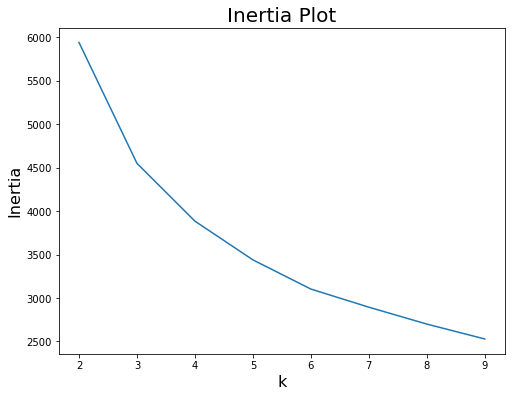

In [8]:
np.random.seed(42)
s = np.zeros(8)
for k in range(0, 8):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(X_std)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Inertia Plot', fontsize = 20)

## K=4 is optimal
K=4 is at the elbow of the score graph

In [9]:
cluster = KMeans(n_clusters = 4, n_init=100)
cluster.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
acs['clusterLabels'] = cluster.labels_

In [11]:
acs.clusterLabels.value_counts()

1    780
0    772
3    305
2    263
Name: clusterLabels, dtype: int64

## Investigate clusters' statistics

In [12]:
for i in range(0,4):
    group = acs[acs['clusterLabels'] == i]
    print('Group ' + str(i) + ':')
    print('    Group Size: ' + str(len(group)))
    print('    Population: ' + str(round(group.total_population.mean(),2)))
    print('    Median Age: ' + str(round(group.median_age.mean(),2)))
    print('    Median Income: ' + str(round(group.median_income.mean(),2)))
    print('    Percent with Bachelors Degree: ' + str(round(group.total_bachelors_degree.mean(),2)))

Group 0:
    Group Size: 772
    Population: 2937.29
    Median Age: 41.8
    Median Income: 33317.4
    Percent with Bachelors Degree: 21.92
Group 1:
    Group Size: 780
    Population: 3486.4
    Median Age: 32.14
    Median Income: 22461.99
    Percent with Bachelors Degree: 13.6
Group 2:
    Group Size: 263
    Population: 4611.42
    Median Age: 37.32
    Median Income: 68206.94
    Percent with Bachelors Degree: 39.54
Group 3:
    Group Size: 305
    Population: 7416.63
    Median Age: 35.73
    Median Income: 24814.2
    Percent with Bachelors Degree: 16.27


## Comments on Groups:


### Group 0:
- Smallest population
- Oldest

### Group 1:
- Youngest
- Poorest
- Least Educated

### Group 2:
- Richest
- Most Educated

### Group 3:
- Largest Population

## Write data to .csv

In [13]:
acs.head()

,Unnamed: 0,census_tract,total_population,median_age,total_population_25yrsandover,total_bachelors_degree,median_income,clusterLabels
0,0,Bronx_1,7503.0,32.1,303.0,0.7,10778.0,3
1,1,Bronx_2,5251.0,38.6,449.0,11.8,30760.0,3
2,2,Bronx_4,5980.0,39.4,300.0,14.3,32371.0,3
3,3,Bronx_16,6056.0,36.9,325.0,5.8,17848.0,3
4,4,Bronx_19,2682.0,32.5,227.0,13.7,21788.0,1


In [14]:
acs.to_csv('acsClusters.csv')